In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
with open('data/X_test.pickle', 'rb') as file:
    #y_train = pickle.load(file)
    X_test = pd.read_pickle(file)
    #X_test = X_test.values
    
with open('data/y_test.pickle', 'rb') as file:
    #y_train = pickle.load(file)
    y_test = pd.read_pickle(file)
    #y_test = y_test.values.ravel()

#df_test_info = pd.read_csv("x_test_df.csv")
df_test_info = pd.read_csv("tree_info_x.csv")
df_test_info = df_test_info.reset_index(names="index")
df_test_info = df_test_info.drop(["Unnamed: 0"], axis = 1)

In [18]:
df_test_info

index           u           v                   osmid  \
0          0  7434184322  7434184333                 1881218   
1          1  4581844469  9350829316               403438016   
2          2  3185019791    30568728               741116145   
3          3  3289070014  4502345275                41501770   
4          4  2292894515  4468826575               160979575   
...      ...         ...         ...                     ...   
10407  10407   747283591   747283595                60827343   
10408  10408  4589938959  4589938960                35085128   
10409  10409  2021886937   635707170                26284012   
10410  10410  1331051392  1331051329  [942805400, 118348804]   
10411  10411  9924430834  9925622438              1067404939   

                          name      highway  maxspeed   length  lanes  \
0                Enghave Plads     tertiary      50.0   58.437      2   
1                    Marmorvej        other      50.0    6.854      2   
2                   Brombærvej  residential      50.0    6.273      2   
3      Gunnar Nu Hansens Plads      service      50.0   52.555      2   
4                 Skagerrakvej      service      50.0   81.904      2   
...                        ...          ...       ...      ...    ...   
10407                      NaN         path      50.0   21.095      2   
10408                      NaN      service      50.0   17.449      2   
10409    Nielsine Nielsens Vej      service      30.0   43.578      2   
10410                      NaN      service      50.0  132.775      2   
10411                      NaN      service      50.0   25.506      2   

                                                geometry  ...       id  \
0      LINESTRING (12.5463404 55.6674291, 12.5471459 ...  ...  87423.0   
1      LINESTRING (12.5958473 55.7044068, 12.5958416 ...  ...      NaN   
2      LINESTRING (12.5179828 55.696244, 12.5179723 5...  ...      NaN   
3      LINESTRING (12.5748782 55.7048787, 12.5740406 ...  ...      NaN   
4      LINESTRING (12.6061232 55.7146849, 12.6065568 ...  ...      NaN   
...                                                  ...  ...      ...   
10407  LINESTRING (12.5764101 55.6697458, 12.5761743 ...  ...      NaN   
10408  LINESTRING (12.5169975 55.6597284, 12.5169927 ...  ...      NaN   
10409  LINESTRING (12.5416409 55.7130881, 12.5410718 ...  ...      NaN   
10410  LINESTRING (12.6144026 55.6976593, 12.6142751 ...  ...      NaN   
10411  LINESTRING (12.5759108 55.6996311, 12.5762074 ...  ...  89263.0   

            slaegt                 bydelsnavn      placering  omgivelse  \
0      Robinia sp.  Vesterbro-Kongens Enghave  Torv og plads       Grus   
1                0                          0              0          0   
2                0                          0              0          0   
3                0                          0              0          0   
4                0                          0              0          0   
...            ...                        ...            ...        ...   
10407            0                          0              0          0   
10408            0                          0              0          0   
10409            0                          0              0          0   
10410            0                          0              0          0   
10411    Tilia sp.                   Østerbro  Torv og plads       Grus   

                                       wkb_geometry  planteaar        lon  \
0      POINT (12.546860419131313 55.66737306195246)     2018.0  12.546860   
1                                               NaN        0.0        NaN   
2                                               NaN        0.0        NaN   
3                                               NaN        0.0        NaN   
4                                               NaN        0.0        NaN   
...                                             ...        ...        ...   
10407                           

In [19]:
df = pd.DataFrame(X_test, columns = ["maxspeed", "length", "lanes", 'buildings_count',
                                   'landuse_count','natural_count', 'railways_p_count',
                                    'roads_p_count', 'pofw_count', 'pois_count', 'pois_p_count',
                                'traffic_count', 'traffic_p_count', 'transport_p_count','water_count', 'waterways_p_count',
                    "distance_from_center", 'bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary'])



In [20]:
df

maxspeed    length     lanes  buildings_count  landuse_count  \
0           0.8  0.049532  0.333333              0.0            0.0   
1           0.8  0.005712  0.333333              0.0            0.0   
2           0.8  0.005219  0.333333              0.0            0.0   
3           0.8  0.044535  0.333333              0.0            0.0   
4           0.8  0.069467  0.333333              0.0            0.0   
...         ...       ...       ...              ...            ...   
10407       0.8  0.017810  0.333333              0.0            0.0   
10408       0.8  0.014713  0.333333              0.0            0.0   
10409       0.4  0.036909  0.333333              0.0            0.0   
10410       0.8  0.112683  0.333333              0.0            0.0   
10411       0.8  0.021557  0.333333              0.0            0.0   

       natural_count  railways_p_count  roads_p_count  pofw_count  pois_count  \
0                0.0               0.0         0.1875         0.0         0.0   
1                0.0               0.0         0.1875         0.0         0.0   
2                0.0               0.0         0.2500         0.0         0.0   
3                0.0               0.0         0.1875         0.0         0.0   
4                0.0               0.0         0.1875         0.0         0.0   
...              ...               ...            ...         ...         ...   
10407            0.0               0.0         0.1875         0.0         0.0   
10408            0.0               0.0         0.1250         0.0         0.0   
10409            0.0               0.0         0.1875         0.0         0.0   
10410            0.0               0.0         0.2500         0.0         0.0   
10411            0.0               0.0         0.1875         0.0         0.0   

       ...  distance_from_center  bridge  tunnel  highway_cycleway  \
0      ...              0.291367     0.0     0.0               0.0   
1      ...              0.286369     0.0     0.0               0.0   
2      ...              0.387556     0.0     0.0               0.0   
3      ...              0.228071     0.0     0.0               0.0   
4      ...              0.438132     0.0     0.0               0.0   
...    ...                   ...     ...     ...               ...   
10407  ...              0.214960     0.0     0.0               0.0   
10408  ...              0.505857     0.0     0.0               0.0   
10409  ...              0.386546     0.0     0.0               0.0   
10410  ...              0.339200     0.0     0.0               0.0   
10411  ...              0.164363     0.0     0.0               0.0   

       highway_footway  highway_other  highway_path  highway_residential  \
0                  0.0            0.0           0.0                  0.0   
1                  0.0            1.0           0.0                  0.0   
2                  0.0            0.0           0.0                  1.0   
3                  0.0            0.0           0.0                  0.0   
4                  0.0            0.0           0.0                  0.0   
...                ...            ...           ...                  ...   
10407              0.0            0.0           1.0                  0.0   
10408              0.0            0.0           0.0                  0.0   
10409              0.0            0.0           0.0                  0.0   
10410              0.0            0.0           0.0                  0.0   
10411              0.0            0.0           0.0                  0.0   

       highway_service  highway_tertiary  
0                  0.0               1.0  
1                  0.0               0.0  
2                  0.0               0.0  
3                  1.0               0.0  
4                  1.0               0.0  
...                ...               ...  
10407              0.0               0.0  
10408              1.0               0.0  
10409              1.0               0.0

In [21]:
df_preds = pd.read_csv("prediction.csv", index_col = 0)
df_preds

predictions
0             True
1            False
2            False
3             True
4            False
...            ...
10407         True
10408        False
10409        False
10410        False
10411         True

[10412 rows x 1 columns]

In [22]:
df_proba = pd.read_csv("probas.csv", index_col = 0)
df_proba.head()

probas
0  0.682234
1  0.301515
2  0.177066
3  0.535715
4  0.396669

In [23]:
y_test.head()

tree
77954   1.0
59191   0.0
48511   0.0
49268   0.0
43743   0.0

In [24]:
y_test = y_test.reset_index()

In [25]:
merged = pd.merge(df_preds, y_test, left_index=True, right_index=True)

In [26]:
merged = pd.merge(merged, df_proba, left_index=True, right_index=True)

In [27]:
merged = pd.merge(merged, df, left_index=True, right_index=True)

In [28]:
merged

predictions  index  tree    probas  maxspeed    length     lanes  \
0             True  77954   1.0  0.682234       0.8  0.049532  0.333333   
1            False  59191   0.0  0.301515       0.8  0.005712  0.333333   
2            False  48511   0.0  0.177066       0.8  0.005219  0.333333   
3             True  49268   0.0  0.535715       0.8  0.044535  0.333333   
4            False  43743   0.0  0.396669       0.8  0.069467  0.333333   
...            ...    ...   ...       ...       ...       ...       ...   
10407         True  23425   0.0  0.528510       0.8  0.017810  0.333333   
10408        False  59227   0.0  0.271112       0.8  0.014713  0.333333   
10409        False  42250   0.0  0.322047       0.4  0.036909  0.333333   
10410        False  29220   0.0  0.320182       0.8  0.112683  0.333333   
10411         True  93254   1.0  0.600484       0.8  0.021557  0.333333   

       buildings_count  landuse_count  natural_count  ...  \
0                  0.0            0.0            0.0  ...   
1                  0.0            0.0            0.0  ...   
2                  0.0            0.0            0.0  ...   
3                  0.0            0.0            0.0  ...   
4                  0.0            0.0            0.0  ...   
...                ...            ...            ...  ...   
10407              0.0            0.0            0.0  ...   
10408              0.0            0.0            0.0  ...   
10409              0.0            0.0            0.0  ...   
10410              0.0            0.0            0.0  ...   
10411              0.0            0.0            0.0  ...   

       distance_from_center  bridge  tunnel  highway_cycleway  \
0                  0.291367     0.0     0.0               0.0   
1                  0.286369     0.0     0.0               0.0   
2                  0.387556     0.0     0.0               0.0   
3                  0.228071     0.0     0.0               0.0   
4                  0.438132     0.0     0.0               0.0   
...                     ...     ...     ...               ...   
10407              0.214960     0.0     0.0               0.0   
10408              0.505857     0.0     0.0               0.0   
10409              0.386546     0.0     0.0               0.0   
10410              0.339200     0.0     0.0               0.0   
10411              0.164363     0.0     0.0               0.0   

       highway_footway  highway_other  highway_path  highway_residential  \
0                  0.0            0.0           0.0                  0.0   
1                  0.0            1.0           0.0                  0.0   
2                  0.0            0.0           0.0                  1.0   
3                  0.0            0.0           0.0                  0.0   
4                  0.0            0.0           0.0                  0.0   
...                ...            ...           ...                  ...   
10407              0.0            0.0           1.0                  0.0   
10408              0.0            0.0           0.0                  0.0   
10409              0.0            0.0           0.0                  0.0   
10410              0.0            0.0           0.0                  0.0   
10411              0.0            0.0           0.0                  0.0   

       highway_service  highway_tertiary  
0                  0.0               1.0  
1                  0.0               0.0  
2                  0.0               0.0  
3                  1.0               0.0  
4                  1.0               0.0  
...                ...               ...  
10407              0.0               0.0  
10408              1.0               0.0  
10409              1.0               0.0  
10410              1.0               0.0  
10411              1.0               0.0  

[10412 rows x 30 columns]

In [29]:
true_positives = merged.query("predictions == False and tree == 0")
true_positives.head()

predictions   index  tree    probas  maxspeed    length     lanes  \
1        False   59191   0.0  0.301515       0.8  0.005712  0.333333   
2        False   48511   0.0  0.177066       0.8  0.005219  0.333333   
4        False   43743   0.0  0.396669       0.8  0.069467  0.333333   
5        False   41574   0.0  0.376542       0.8  0.028967  1.000000   
7        False  101260   0.0  0.227028       0.8  0.009264  0.333333   

   buildings_count  landuse_count  natural_count  ...  distance_from_center  \
1              0.0            0.0            0.0  ...              0.286369   
2              0.0            0.0            0.0  ...              0.387556   
4              0.0            0.0            0.0  ...              0.438132   
5              0.0            0.0            0.0  ...              0.130545   
7              0.0            0.0            0.0  ...              0.453372   

   bridge  tunnel  highway_cycleway  highway_footway  highway_other  \
1     0.0     0.0               0.0              0.0            1.0   
2     0.0     0.0               0.0              0.0            0.0   
4     0.0     0.0               0.0              0.0            0.0   
5     0.0     0.0               0.0              0.0            0.0   
7     0.0     0.0               0.0              1.0            0.0   

   highway_path  highway_residential  highway_service  highway_tertiary  
1           0.0                  0.0              0.0               0.0  
2           0.0                  1.0              0.0               0.0  
4           0.0                  0.0              1.0               0.0  
5           0.0                  0.0              0.0               1.0  
7           0.0                  0.0              0.0               0.0  

[5 rows x 30 columns]

In [30]:
true_negatives = merged.query("predictions == True and tree == 1")
true_negatives.head()

predictions  index  tree    probas  maxspeed    length     lanes  \
0          True  77954   1.0  0.682234       0.8  0.049532  0.333333   
9          True  73046   1.0  0.553741       0.8  0.036988  0.333333   
10         True  45681   1.0  0.573664       0.8  0.038479  0.333333   
14         True   8997   1.0  0.759020       0.8  0.096396  0.333333   
29         True   7581   1.0  0.701756       0.8  0.061282  0.333333   

    buildings_count  landuse_count  natural_count  ...  distance_from_center  \
0               0.0            0.0            0.0  ...              0.291367   
9               0.0            0.0            0.0  ...              0.255996   
10              0.0            0.0            0.0  ...              0.166157   
14              0.0            0.0            0.0  ...              0.146498   
29              0.0            0.0            0.0  ...              0.250820   

    bridge  tunnel  highway_cycleway  highway_footway  highway_other  \
0      0.0     0.0               0.0              0.0            0.0   
9      0.0     0.0               0.0              1.0            0.0   
10     0.0     0.0               0.0              0.0            0.0   
14     0.0     0.0               0.0              0.0            0.0   
29     0.0     0.0               0.0              0.0            0.0   

    highway_path  highway_residential  highway_service  highway_tertiary  
0            0.0                  0.0              0.0               1.0  
9            0.0                  0.0              0.0               0.0  
10           0.0                  0.0              1.0               0.0  
14           0.0                  1.0              0.0               0.0  
29           0.0                  0.0              0.0               1.0  

[5 rows x 30 columns]

In [31]:
false_positives = merged.query("predictions == False and tree == 1")
false_positives.head()

predictions  index  tree    probas  maxspeed    length     lanes  \
28        False  24388   1.0  0.236125       0.8  0.054435  0.333333   
30        False  30256   1.0  0.127577       0.8  0.063460  0.333333   
47        False  37941   1.0  0.343729       0.8  0.141321  0.333333   
59        False   2898   1.0  0.087665       0.8  0.122660  0.333333   
97        False  78133   1.0  0.352945       0.8  0.020500  0.333333   

    buildings_count  landuse_count  natural_count  ...  distance_from_center  \
28              0.0       0.000000            0.0  ...              0.246238   
30              0.0       0.666667            0.0  ...              0.253557   
47              0.0       0.000000            0.0  ...              0.333898   
59              0.0       0.333333            0.0  ...              0.472103   
97              0.0       0.000000            0.0  ...              0.429598   

    bridge  tunnel  highway_cycleway  highway_footway  highway_other  \
28     0.0     0.0               0.0              0.0            0.0   
30     0.0     1.0               0.0              0.0            1.0   
47     0.0     0.0               0.0              0.0            0.0   
59     0.0     0.0               0.0              0.0            0.0   
97     0.0     0.0               0.0              0.0            0.0   

    highway_path  highway_residential  highway_service  highway_tertiary  
28           0.0                  0.0              0.0               1.0  
30           0.0                  0.0              0.0               0.0  
47           0.0                  0.0              1.0               0.0  
59           1.0                  0.0              0.0               0.0  
97           0.0                  0.0              1.0               0.0  

[5 rows x 30 columns]

In [32]:
false_negatives = merged.query("predictions == True and tree == 0")
false_negatives.head()

predictions  index  tree    probas  maxspeed    length     lanes  \
3          True  49268   0.0  0.535715       0.8  0.044535  0.333333   
6          True  23205   0.0  0.657517       0.8  0.049703  0.333333   
12         True  24143   0.0  0.554679       0.8  0.037399  0.333333   
15         True  51538   0.0  0.511671       0.8  0.019650  0.333333   
21         True  52611   0.0  0.534331       0.8  0.237238  0.333333   

    buildings_count  landuse_count  natural_count  ...  distance_from_center  \
3               0.0            0.0            0.0  ...              0.228071   
6               0.0            0.0            0.0  ...              0.189735   
12              0.0            0.0            0.0  ...              0.304747   
15              0.0            0.0            0.0  ...              0.633520   
21              0.0            0.0            0.0  ...              0.500212   

    bridge  tunnel  highway_cycleway  highway_footway  highway_other  \
3      0.0     0.0               0.0              0.0            0.0   
6      0.0     0.0               0.0              0.0            1.0   
12     0.0     0.0               0.0              1.0            0.0   
15     0.0     0.0               0.0              0.0            0.0   
21     0.0     0.0               0.0              0.0            1.0   

    highway_path  highway_residential  highway_service  highway_tertiary  
3            0.0                  0.0              1.0               0.0  
6            0.0                  0.0              0.0               0.0  
12           0.0                  0.0              0.0               0.0  
15           0.0                  1.0              0.0               0.0  
21           0.0                  0.0              0.0               0.0  

[5 rows x 30 columns]

# Analysis of true negatives

In [33]:
boxplots_tn=true_negatives.drop(["predictions", "tree", "index", 'bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary'], axis = 1)


In [20]:
boxplots_tn.head()

probas  maxspeed    length     lanes  buildings_count  landuse_count  \
0   0.682234       0.8  0.049532  0.333333              0.0            0.0   
9   0.553741       0.8  0.036988  0.333333              0.0            0.0   
10  0.573664       0.8  0.038479  0.333333              0.0            0.0   
14  0.759020       0.8  0.096396  0.333333              0.0            0.0   
29  0.701756       0.8  0.061282  0.333333              0.0            0.0   

    natural_count  railways_p_count  roads_p_count  pofw_count  pois_count  \
0             0.0               0.0         0.1875         0.0         0.0   
9             0.0               0.0         0.2500         0.0         0.0   
10            0.0               0.0         0.2500         0.0         0.0   
14            0.0               0.0         0.1875         0.0         0.0   
29            0.0               0.0         0.1875         0.0         0.0   

    pois_p_count  traffic_count  traffic_p_count  transport_p_count  \
0            0.0            0.0              0.0                0.0   
9            0.0            0.0              0.0                0.0   
10           0.0            0.0              0.0                0.0   
14           0.0            0.0              0.0                0.0   
29           0.0            0.0              0.0                0.0   

    water_count  waterways_p_count  distance_from_center  
0           0.0                0.0              0.291367  
9           0.0                0.0              0.255996  
10          0.0                0.0              0.166157  
14          0.0                0.0              0.146498  
29          0.0                0.0              0.250820

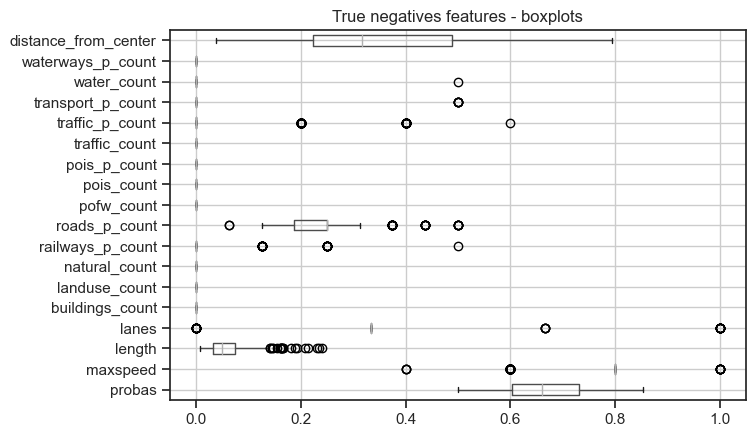

In [21]:
sns.set(style="ticks")
#sns.set_style("whitegrid", {'axes.grid' : True})


fig1, ax1 = plt.subplots()
ax1.set_title('True negatives features - boxplots')
#ax1.boxplot(boxplots_fp)
boxplots_tn.boxplot(vert = False)
plt.subplots_adjust(left=0.0001)
#ax1.set_xticklabels(["predictions","tree","probas","maxspeed", "length", "lanes", 'buildings_count',
#                                   'landuse_count','natural_count', 'railways_p_count',
#                                    'roads_p_count', 'pofw_count', 'pois_count', 'pois_p_count',
#                                'traffic_count', 'traffic_p_count', 'transport_p_count','water_count', 'waterways_p_count',
#                    "distance_from_center"], rotation = 90)
plt.show()


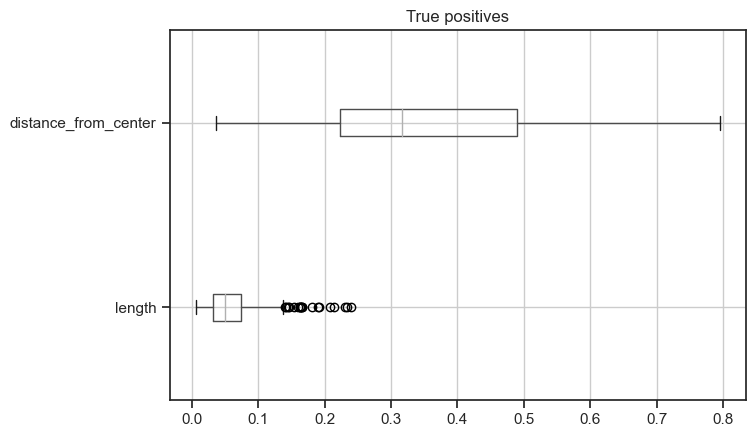

In [571]:
sns.set(style="ticks")
#sns.set_style("whitegrid", {'axes.grid' : True})


fig1, ax1 = plt.subplots()
ax1.set_title('True positives')
#ax1.boxplot(boxplots_fp)
boxplots_tn[["length", "distance_from_center"]].boxplot(vert = False)
plt.subplots_adjust(left=0.0001)
#ax1.set_xticklabels(["predictions","tree","probas","maxspeed", "length", "lanes", 'buildings_count',
#                                   'landuse_count','natural_count', 'railways_p_count',
#                                    'roads_p_count', 'pofw_count', 'pois_count', 'pois_p_count',
#                                'traffic_count', 'traffic_p_count', 'transport_p_count','water_count', 'waterways_p_count',
#                    "distance_from_center"], rotation = 90)
plt.show()

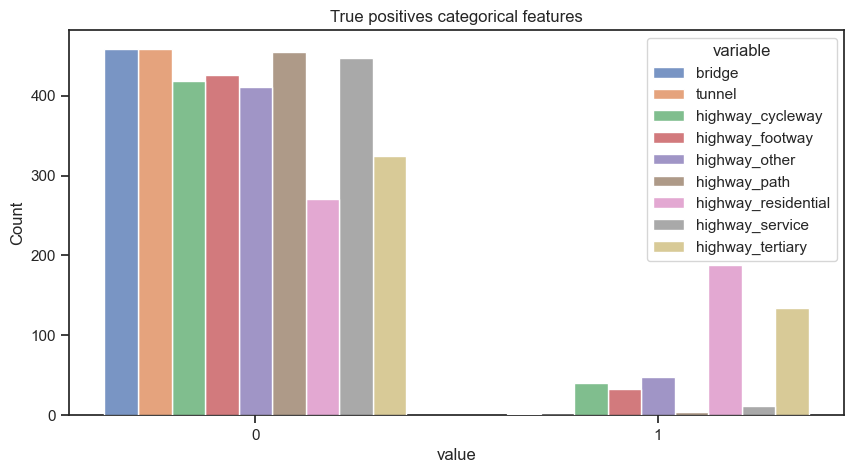

In [570]:
sns.set(style="ticks")
plt.figure(figsize = (10,5))

#plt.set_axisbelow(True)

tn_categorical = true_negatives[['bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary']]

plt.title('True positives categorical features')

# plot melted dataframe in a single command
ax =sns.histplot(tn_categorical.melt(), x='value', hue='variable',
             multiple='dodge', shrink = .75, bins=np.arange(3)-0.5, zorder=10)

ax.set_axisbelow(True)


sns.set_style("whitegrid", {'axes.grid' : True})
#ax.grid(color='gray', zorder = 0 ,linewidth = "0.5")
plt.grid(which='minor', color='black', linewidth=0.075)


ax.set_xticks([0,1])
plt.show()

In [23]:
#Randomly choose five rows for image inspection
random_tn = true_negatives.sample(5)

# Analysis of true positives

In [579]:
boxplots_tp=true_positives.drop(["predictions", "tree", "index", 'bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary'], axis = 1)

In [580]:
boxplots_tp.head()

probas  maxspeed    length     lanes  buildings_count  landuse_count  \
1  0.301515       0.8  0.005712  0.333333              0.0            0.0   
2  0.177066       0.8  0.005219  0.333333              0.0            0.0   
4  0.396669       0.8  0.069467  0.333333              0.0            0.0   
5  0.376542       0.8  0.028967  1.000000              0.0            0.0   
7  0.227028       0.8  0.009264  0.333333              0.0            0.0   

   natural_count  railways_p_count  roads_p_count  pofw_count  pois_count  \
1            0.0               0.0         0.1875         0.0         0.0   
2            0.0               0.0         0.2500         0.0         0.0   
4            0.0               0.0         0.1875         0.0         0.0   
5            0.0               0.0         0.3125         0.0         0.0   
7            0.0               0.0         0.2500         0.0         0.0   

   pois_p_count  traffic_count  traffic_p_count  transport_p_count  \
1           0.0            0.0              0.0                0.0   
2           0.0            0.0              0.0                0.0   
4           0.0            0.0              0.0                0.0   
5           0.0            0.0              0.2                0.5   
7           0.0            0.0              0.0                0.0   

   water_count  waterways_p_count  distance_from_center  
1          0.0                0.0              0.286369  
2          0.0                0.0              0.387556  
4          0.0                0.0              0.438132  
5          0.0                0.0              0.130545  
7          0.0                0.0              0.453372

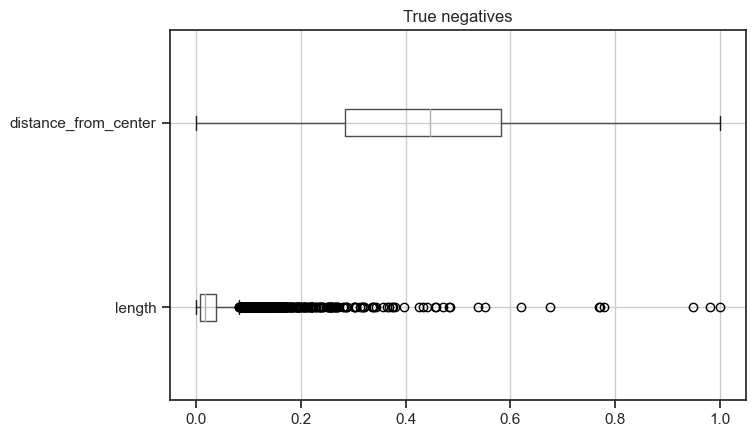

In [581]:
sns.set(style="ticks")
#sns.set_style("whitegrid", {'axes.grid' : True})


fig1, ax1 = plt.subplots()
ax1.set_title('True negatives')
#ax1.boxplot(boxplots_fp)
boxplots_tp[["length", "distance_from_center"]].boxplot(vert = False)
plt.subplots_adjust(left=0.0001)
#ax1.set_xticklabels(["predictions","tree","probas","maxspeed", "length", "lanes", 'buildings_count',
#                                   'landuse_count','natural_count', 'railways_p_count',
#                                    'roads_p_count', 'pofw_count', 'pois_count', 'pois_p_count',
#                                'traffic_count', 'traffic_p_count', 'transport_p_count','water_count', 'waterways_p_count',
#                    "distance_from_center"], rotation = 90)
plt.show()

([<matplotlib.axis.XTick at 0x7fe0e9b5a0a0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

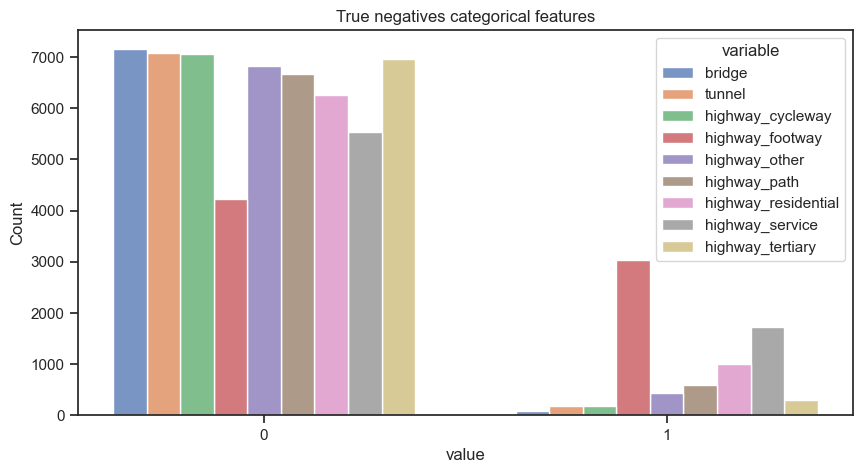

In [569]:
sns.set(style="ticks")
plt.figure(figsize = (10,5))

tp_categorical = true_positives[['bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary']]

plt.title('True negatives categorical features')


# plot melted dataframe in a single command
sns.histplot(tp_categorical.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=np.arange(3)-0.5);

plt.xticks([0,1])

In [55]:
#Randomly choose five rows for image inspection
random_tp = true_positives.sample(5)

# Analysis of false negatives

In [576]:
boxplots_fn=false_negatives.drop(["predictions", "tree", "index", 'bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary'], axis = 1)

In [577]:
boxplots_fn.head()

probas  maxspeed    length     lanes  buildings_count  landuse_count  \
3   0.535715       0.8  0.044535  0.333333              0.0            0.0   
6   0.657517       0.8  0.049703  0.333333              0.0            0.0   
12  0.554679       0.8  0.037399  0.333333              0.0            0.0   
15  0.511671       0.8  0.019650  0.333333              0.0            0.0   
21  0.534331       0.8  0.237238  0.333333              0.0            0.0   

    natural_count  railways_p_count  roads_p_count  pofw_count  pois_count  \
3             0.0               0.0         0.1875         0.0         0.0   
6             0.0               0.0         0.3125         0.0         0.0   
12            0.0               0.0         0.2500         0.0         0.0   
15            0.0               0.0         0.1875         0.0         0.0   
21            0.0               0.0         0.2500         0.0         0.0   

    pois_p_count  traffic_count  traffic_p_count  transport_p_count  \
3            0.0            0.0              0.0                0.0   
6            0.0            0.0              0.0                0.0   
12           0.0            0.0              0.0                0.0   
15           0.0            0.0              0.0                0.5   
21           0.0            0.0              0.0                0.0   

    water_count  waterways_p_count  distance_from_center  
3           0.0                0.0              0.228071  
6           0.0                0.0              0.189735  
12          0.0                0.0              0.304747  
15          0.0                0.0              0.633520  
21          0.0                0.0              0.500212

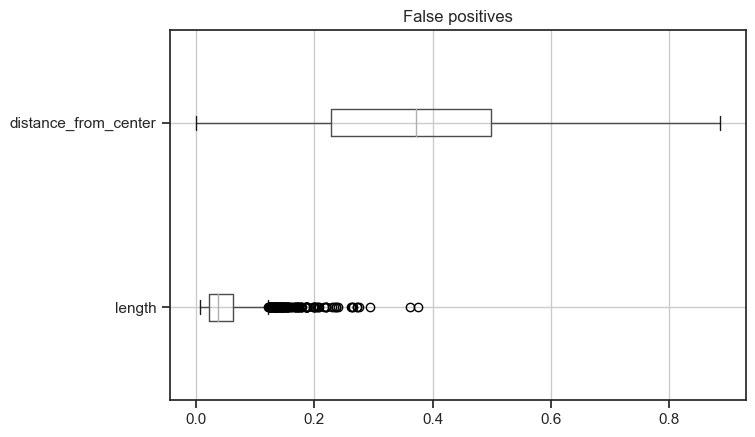

In [578]:
sns.set(style="ticks")
#sns.set_style("whitegrid", {'axes.grid' : True})


fig1, ax1 = plt.subplots()
ax1.set_title('False positives')
#ax1.boxplot(boxplots_fp)
boxplots_fn[["length", "distance_from_center"]].boxplot(vert = False)
plt.subplots_adjust(left=0.0001)
#ax1.set_xticklabels(["predictions","tree","probas","maxspeed", "length", "lanes", 'buildings_count',
#                                   'landuse_count','natural_count', 'railways_p_count',
#                                    'roads_p_count', 'pofw_count', 'pois_count', 'pois_p_count',
#                                'traffic_count', 'traffic_p_count', 'transport_p_count','water_count', 'waterways_p_count',
#                    "distance_from_center"], rotation = 90)
plt.show()

([<matplotlib.axis.XTick at 0x7fe0e45ed9d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

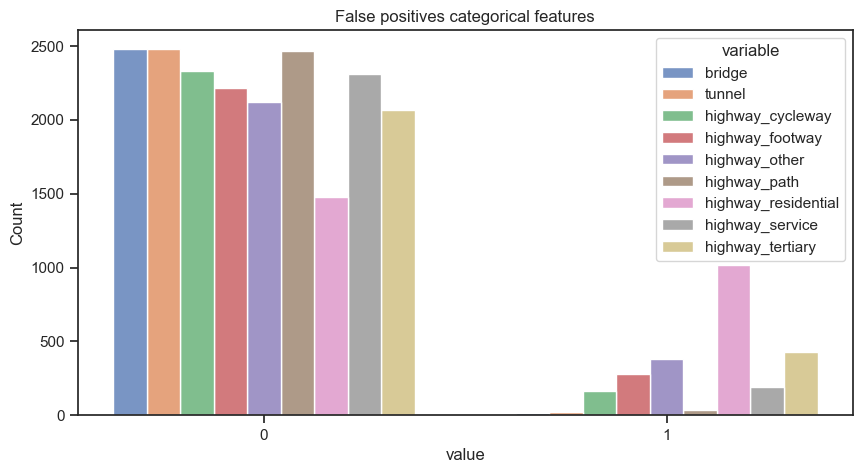

In [568]:
sns.set(style="ticks")
plt.figure(figsize = (10,5))

fn_categorical = false_negatives[['bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary']]

plt.title('False positives categorical features')

# plot melted dataframe in a single command
sns.histplot(fn_categorical.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=np.arange(3)-0.5);

plt.xticks([0,1])

In [33]:
#Randomly choose five rows for image inspection
random_fn = false_negatives.sample(5)

# Analysis of false positives

In [582]:
boxplots_fp=false_positives.drop(["predictions", "tree", "index", 'bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary'], axis = 1)

In [583]:
boxplots_fp.head()

probas  maxspeed    length     lanes  buildings_count  landuse_count  \
28  0.236125       0.8  0.054435  0.333333              0.0       0.000000   
30  0.127577       0.8  0.063460  0.333333              0.0       0.666667   
47  0.343729       0.8  0.141321  0.333333              0.0       0.000000   
59  0.087665       0.8  0.122660  0.333333              0.0       0.333333   
97  0.352945       0.8  0.020500  0.333333              0.0       0.000000   

    natural_count  railways_p_count  roads_p_count  pofw_count  pois_count  \
28            0.0             0.125         0.3125         0.0         0.0   
30            0.0             0.000         0.6875         0.0         0.0   
47            0.0             0.000         0.3125         0.0         0.0   
59            0.0             0.000         0.2500         0.0         0.0   
97            0.0             0.000         0.1875         0.0         0.0   

    pois_p_count  traffic_count  traffic_p_count  transport_p_count  \
28           0.0            0.0              0.4                0.0   
30           0.0            0.0              0.0                0.0   
47           0.0            0.0              0.0                0.0   
59           0.0            0.0              0.0                0.0   
97           0.0            0.0              0.0                0.0   

    water_count  waterways_p_count  distance_from_center  
28          0.0                0.0              0.246238  
30          0.0                0.0              0.253557  
47          0.0                0.0              0.333898  
59          0.0                0.0              0.472103  
97          0.0                0.0              0.429598

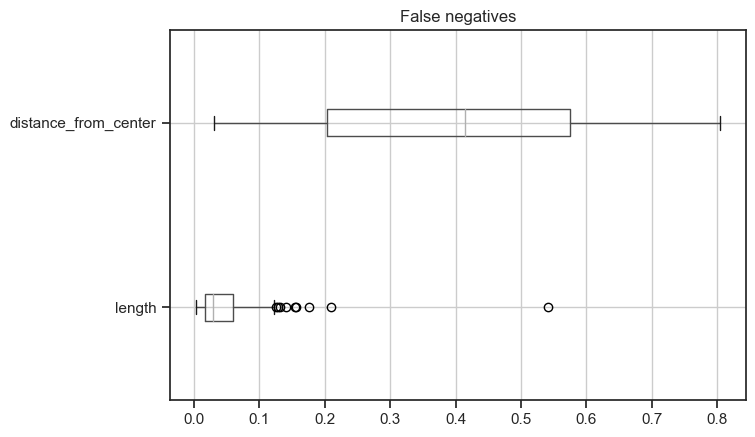

In [585]:
sns.set(style="ticks")
#sns.set_style("whitegrid", {'axes.grid' : True})


fig1, ax1 = plt.subplots()
ax1.set_title('False negatives')
#ax1.boxplot(boxplots_fp)
boxplots_fp[["length", "distance_from_center"]].boxplot(vert = False)
plt.subplots_adjust(left=0.0001)
#ax1.set_xticklabels(["predictions","tree","probas","maxspeed", "length", "lanes", 'buildings_count',
#                                   'landuse_count','natural_count', 'railways_p_count',
#                                    'roads_p_count', 'pofw_count', 'pois_count', 'pois_p_count',
#                                'traffic_count', 'traffic_p_count', 'transport_p_count','water_count', 'waterways_p_count',
#                    "distance_from_center"], rotation = 90)
plt.show()

([<matplotlib.axis.XTick at 0x7fe0efbf1130>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

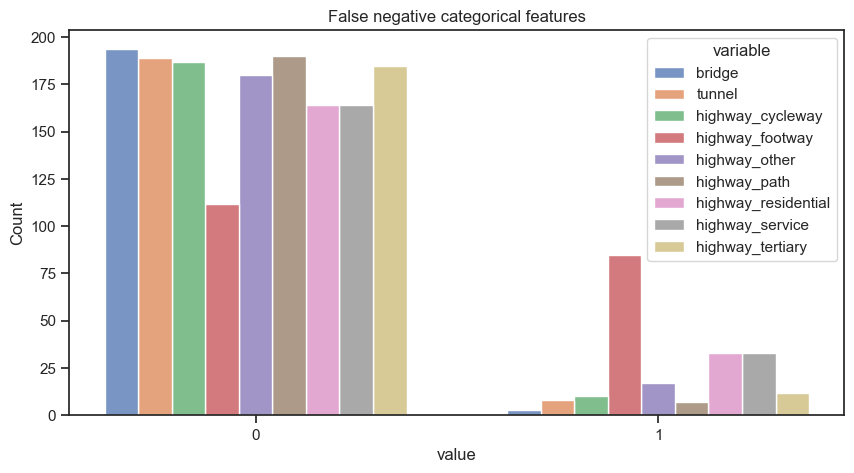

In [567]:
sns.set(style="ticks")

plt.figure(figsize = (10,5))
fp_categorical = false_positives[['bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
       'highway_other', 'highway_path', 'highway_residential',
       'highway_service', 'highway_tertiary']]

plt.title('False negative categorical features')


# plot melted dataframe in a single command
sns.histplot(fp_categorical.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=np.arange(3)-0.5);

plt.xticks([0,1])

In [38]:
#Randomly choose five rows for image inspection
random_fp = false_positives.sample(5)

# Inspect random examples of streets

In [53]:
df_test_info["index"]= df_test_info["Unnamed: 0"].copy()

In [67]:
false_positives.query("name== Lygtemagerstien")

UndefinedVariableError: name 'name' is not defined

In [41]:
random_tn = df_test_info[df_test_info.index.isin(random_tn.index)]

In [42]:
random_tn

Unnamed: 0           u            v                 osmid  \
540        75995  6988428914   4723964785              37451407   
2661       52765  3713903540   3713903550             654823368   
3414        5060     8895232  10567973471             161861732   
4464       30298  1390873979   1679748599  [8353410, 784043645]   
6880       77098  7320545786   1372830575             783753041   

                name   highway  maxspeed   length  lanes  \
540    Amagerbrogade  tertiary      50.0   30.506      2   
2661  Nørre Voldgade  tertiary      40.0   57.760      2   
3414   Amagerbrogade  tertiary      50.0   60.410      2   
4464             NaN   footway      50.0  166.204      2   
6880             NaN   footway      50.0   37.361      2   

                                               geometry  ...       id  \
540   LINESTRING (12.6168651 55.6411226, 12.6167335 ...  ...   6218.0   
2661  LINESTRING (12.56631 55.6790088, 12.5668392 55...  ...   8128.0   
3414  LINESTRING (12.6135485 55.6480855, 12.6137887 ...  ...   6275.0   
4464  LINESTRING (12.5858909 55.6965037, 12.5861457 ...  ...  97955.0   
6880  LINESTRING (12.5545201 55.668096, 12.5539391 5...  ...   6889.0   

            slaegt                 bydelsnavn    placering       omgivelse  \
540   Platanus sp.                Amager Vest    Siderabat            Græs   
2661     Tilia sp.                   Indre By     Vejareal  Fast belægning   
3414  Platanus sp.                 Amager Øst    Siderabat  Fast belægning   
4464     Malus sp.                   Indre By  Grønt anlæg  Fast belægning   
6880         other  Vesterbro-Kongens Enghave     Vejareal  Fast belægning   

                                      wkb_geometry  planteaar        lon  \
540   POINT (12.616725736340081 55.64119966803173)     1992.0  12.616726   
2661   POINT (12.566323369291682 55.6791076026748)     1918.0  12.566323   
3414  POINT (12.61370062245149 55.647979270465804)     2001.0  12.613701   
4464  POINT (12.586020980321742 55.69515508783581)     2022.0  12.586021   
6880   POINT (12.55443092719707 55.66812983797484)     2012.0  12.554431   

            lat  tree_count  
540   55.641200         2.0  
2661  55.679108         4.0  
3414  55.647979         2.0  
4464  55.695155         1.0  
6880  55.668130         1.0  

[5 rows x 37 columns]

In [56]:
random_tp = df_test_info[df_test_info.index.isin(random_tp.index)]
random_tp

Unnamed: 0           u           v      osmid           name   highway  \
137        57386  4305444784  3779551364  430417508  Tapperitorvet  cycleway   
1725       25602  1064514562  1064514532   91622300   Kløvergangen   footway   
1969       17127   287403834   287403216   26244225            NaN   service   
2591        3616     8096076     8096077    8123008  Vagtmestervej   service   
5232       38399  1660766320  1660766331  153369021            NaN      path   

      maxspeed   length  lanes  \
137       50.0    6.009      2   
1725      50.0   51.907      2   
1969      50.0  153.549      2   
2591      50.0  100.110      2   
5232      50.0   51.607      2   

                                               geometry  ...  slaegt  \
137   LINESTRING (12.5352086 55.6636069, 12.5351128 ...  ...       0   
1725  LINESTRING (12.5851752 55.6276099, 12.5850931 ...  ...       0   
1969  LINESTRING (12.5076637 55.6399995, 12.5090971 ...  ...       0   
2591  LINESTRING (12.532482 55.7073358, 12.5324882 5...  ...       0   
5232  LINESTRING (12.5143338 55.7100523, 12.5137458 ...  ...       0   

      bydelsnavn  placering  omgivelse  wkb_geometry  planteaar  lon  lat  \
137            0          0          0           NaN        0.0  NaN  NaN   
1725           0          0          0           NaN        0.0  NaN  NaN   
1969           0          0          0           NaN        0.0  NaN  NaN   
2591           0          0          0           NaN        0.0  NaN  NaN   
5232           0          0          0           NaN        0.0  NaN  NaN   

      tree_count  index  
137          0.0  57386  
1725         0.0  25602  
1969         0.0  17127  
2591         0.0   3616  
5232         0.0  38399  

[5 rows x 38 columns]

In [57]:
random_tp = true_positives.sample(5)

In [58]:
random_tp = df_test_info[df_test_info.index.isin(random_tp.index)]
random_tp

Unnamed: 0            u           v      osmid        name      highway  \
444        75657   6952355270  4924695594  742661267         NaN      footway   
2487       13305    267030260   510888097   24559133   Åbjergvej  residential   
4661       22871    617531293  7660471728   48626376         NaN      service   
7370       97324  10274568512  9747460736  970574721         NaN        other   
9708       17983    293448582  6352788952  753229072  Enghavevej     tertiary   

      maxspeed  length  lanes  \
444       50.0   4.694      2   
2487      50.0  33.082      2   
4661      50.0  11.871      2   
7370      50.0  10.735      2   
9708      50.0   4.608      2   

                                               geometry  ...  slaegt  \
444   LINESTRING (12.5614269 55.6630119, 12.5614775 ...  ...       0   
2487  LINESTRING (12.482125 55.6795036, 12.4825889 5...  ...       0   
4661  LINESTRING (12.4840947 55.7096325, 12.4842556 ...  ...       0   
7370  LINESTRING (12.5493318 55.6544354, 12.5494982 ...  ...       0   
9708  LINESTRING (12.5403007 55.6604311, 12.5402785 ...  ...       0   

      bydelsnavn  placering  omgivelse  wkb_geometry  planteaar  lon  lat  \
444            0          0          0           NaN        0.0  NaN  NaN   
2487           0          0          0           NaN        0.0  NaN  NaN   
4661           0          0          0           NaN        0.0  NaN  NaN   
7370           0          0          0           NaN        0.0  NaN  NaN   
9708           0          0          0           NaN        0.0  NaN  NaN   

      tree_count  index  
444          0.0  75657  
2487         0.0  13305  
4661         0.0  22871  
7370         0.0  97324  
9708         0.0  17983  

[5 rows x 38 columns]

In [59]:
random_fn = df_test_info[df_test_info.index.isin(random_fn.index)]
random_fn

Unnamed: 0          u           v      osmid                name  \
196         1870    7729269     7729261    1814139         Knivholtvej   
5059        4586    8327477  5445485231  744435802          Kastrupvej   
7141       23253  727379987   727379990  359163722          Nørre Allé   
9210        3533    8091693     8091692    1881535      Skoleholdervej   
9806       14304  271804130   368962464   25002853  Brønshøjholms Allé   

          highway  maxspeed   length  lanes  \
196   residential      50.0  103.726      2   
5059     tertiary      50.0   16.094      2   
7141     tertiary      50.0   59.839      2   
9210     tertiary      50.0   83.016      2   
9806  residential      50.0  110.331      2   

                                               geometry  ...  slaegt  \
196   LINESTRING (12.4929671 55.6929003, 12.4944646 ...  ...       0   
5059  LINESTRING (12.6263926 55.6456193, 12.6262108 ...  ...       0   
7141  LINESTRING (12.5618484 55.6968857, 12.5618825 ...  ...       0   
9210  LINESTRING (12.5285263 55.7119022, 12.5298329 ...  ...       0   
9806  LINESTRING (12.5017155 55.7076941, 12.501702 5...  ...       0   

      bydelsnavn  placering  omgivelse  wkb_geometry  planteaar  lon  lat  \
196            0          0          0           NaN        0.0  NaN  NaN   
5059           0          0          0           NaN        0.0  NaN  NaN   
7141           0          0          0           NaN        0.0  NaN  NaN   
9210           0          0          0           NaN        0.0  NaN  NaN   
9806           0          0          0           NaN        0.0  NaN  NaN   

      tree_count  index  
196          0.0   1870  
5059         0.0   4586  
7141         0.0  23253  
9210         0.0   3533  
9806         0.0  14304  

[5 rows x 38 columns]

In [61]:
random_fp = false_positives.sample(5)

In [62]:
random_fp = df_test_info[df_test_info.index.isin(random_fp.index)]
random_fp

Unnamed: 0            u            v       osmid               name  \
4880        87454   9103890421   1906849614   180245124                NaN   
5844        50031   3380868284      8085012    38328779  Frederikssundsvej   
8453       103952  11047105435  11047105434  1189725888                NaN   
9341        53925   3772002062    293845835    26787792                NaN   
10187       26061   1119390305   5446264567   598637744      Hedegaardsvej   

           highway  maxspeed   length  lanes  \
4880      cycleway      50.0    7.297      2   
5844         other      50.0   31.151      2   
8453          path      50.0   15.136      2   
9341      cycleway      50.0  150.987      2   
10187  residential      50.0   55.208      2   

                                                geometry  ...        slaegt  \
4880   LINESTRING (12.4869562 55.7171625, 12.4868417 ...  ...    Prunus sp.   
5844   LINESTRING (12.4904349 55.7058498, 12.489982 5...  ...     Tilia sp.   
8453   LINESTRING (12.5828556 55.6391944, 12.5830914 ...  ...         other   
9341   LINESTRING (12.4856934 55.7126561, 12.4834006 ...  ...    Prunus sp.   
10187  LINESTRING (12.6393725 55.6458564, 12.6402301 ...  ...  Fraxinus sp.   

           bydelsnavn  placering       omgivelse  \
4880   Brønshøj-Husum  Siderabat            Græs   
5844   Brønshøj-Husum   Vejareal  Fast belægning   
8453      Amager Vest  Siderabat            Græs   
9341   Brønshøj-Husum  Siderabat            Græs   
10187      Amager Øst   Vejareal            Grus   

                                        wkb_geometry  planteaar        lon  \
4880    POINT (12.486889033880463 55.71715924821865)     2008.0  12.486889   
5844    POINT (12.490174325641286 55.70598188954554)     1995.0  12.490174   
8453   POINT (12.582925557375734 55.639231968075535)     2022.0  12.582926   
9341    POINT (12.483557745279825 55.71300194406367)     2021.0  12.483558   
10187  POINT (12.639440725017822 55.645820491395526)     2000.0  12.639441   

             lat  tree_count   index  
4880   55.717159         1.0   87454  
5844   55.705982         1.0   50031  
8453   55.639232         1.0  103952  
9341   55.713002         2.0   53925  
10187  55.645820         3.0   26061  

[5 rows x 38 columns]

# Plot predictions

In [39]:
import osmnx as ox

/Users/idathrane/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [137]:
#Extract true negative edges
tn_edges = df_test_info[df_test_info.index.isin(true_negatives.index)]

In [41]:
tn_edges.head()

index           u           v      osmid                      name  \
0       0  7434184322  7434184333    1881218             Enghave Plads   
9       9  6265161129  4607175861  669051044                       NaN   
10     10  2683707673  2683895732  143856049                       NaN   
14     14    24996842    24996765    4215976             Bornholmsgade   
29     29    20927508  4602181848  237106583  Danneskiold-Samsøes Allé   

        highway  maxspeed   length  lanes  \
0      tertiary      50.0   58.437      2   
9       footway      50.0   43.671      2   
10      service      50.0   45.426      2   
14  residential      50.0  113.603      2   
29     tertiary      50.0   72.268      2   

                                             geometry  ...       id  \
0   LINESTRING (12.5463404 55.6674291, 12.5471459 ...  ...  87423.0   
9   LINESTRING (12.6047823 55.6813689, 12.6054054 ...  ...  23489.0   
10  LINESTRING (12.573651 55.6733138, 12.5730995 5...  ...  26163.0   
14  LINESTRING (12.5911801 55.687417, 12.5907147 5...  ...  13567.0   
29  LINESTRING (12.6034147 55.6797768, 12.603565 5...  ...  23457.0   

          slaegt                 bydelsnavn      placering       omgivelse  \
0    Robinia sp.  Vesterbro-Kongens Enghave  Torv og plads            Grus   
9      Tilia sp.                   Indre By      Siderabat            Grus   
10   Robinia sp.                   Indre By  Torv og plads  Fast belægning   
14  Platanus sp.                   Indre By         Fortov  Fast belægning   
29     Tilia sp.                   Indre By      Siderabat            Grus   

                                    wkb_geometry  planteaar        lon  \
0   POINT (12.546860419131313 55.66737306195246)     2018.0  12.546860   
9   POINT (12.604857209258796 55.68133210773521)     2007.0  12.604857   
10  POINT (12.573639643931827 55.67336770915964)     2011.0  12.573640   
14  POINT (12.590800944068333 55.68834050827579)     1985.0  12.590801   
29   POINT (12.603632992755784 55.6801630604947)     2007.0  12.603633   

          lat  tree_count  
0   55.667373         4.0  
9   55.681332         2.0  
10  55.673368         1.0  
14  55.688341         8.0  
29  55.680163        11.0  

[5 rows x 37 columns]

In [42]:
#Extract false negative edges
fn_edges = df_test_info[df_test_info.index.isin(false_negatives.index)]

In [43]:
#Extract false positive edges
fp_edges = df_test_info[df_test_info.index.isin(false_positives.index)]

In [374]:
#Extract true positive edges
tp_edges = df_test_info[df_test_info.index.isin(true_positives.index)]

In [46]:
G = ox.graph_from_place("Copenhagen Municipality, Denmark", network_type = 'drive')

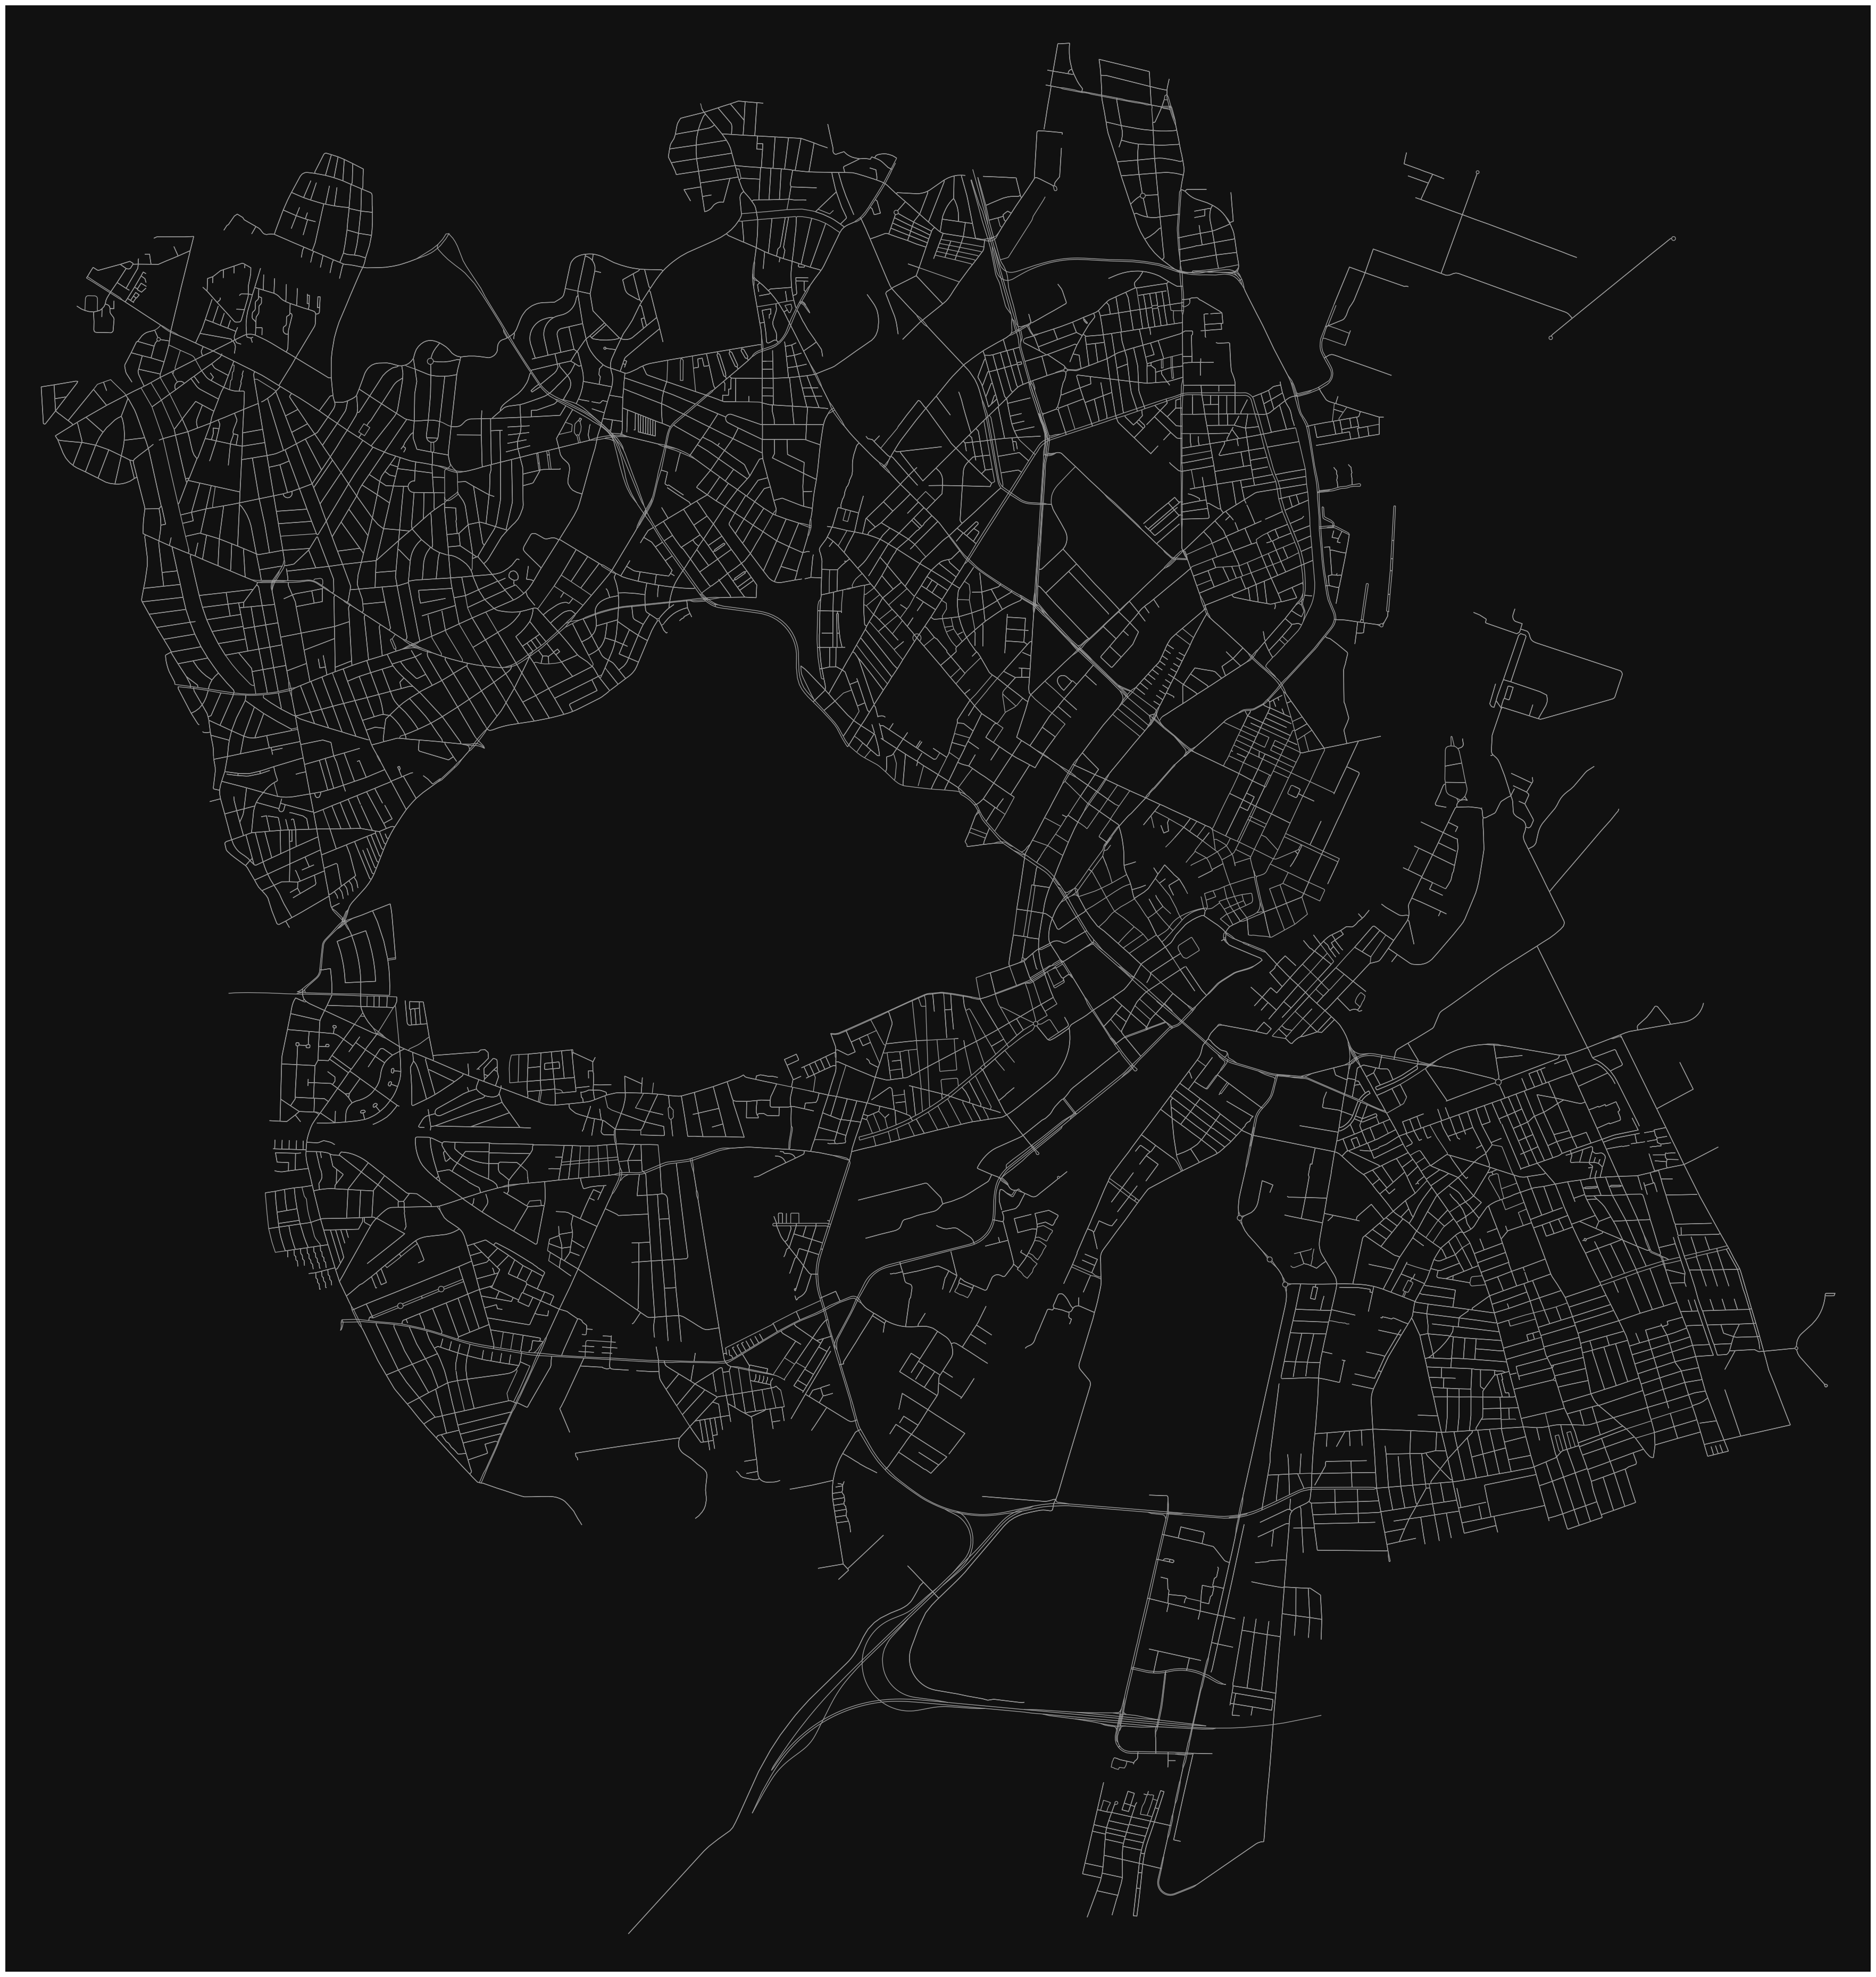

In [54]:
fig, ax = ox.plot_graph(G, node_size=0, figsize=(48, 48), show=False, close=False)    

In [364]:
G2 = ox.load_graphml('graphs/cph_graph.graphml')


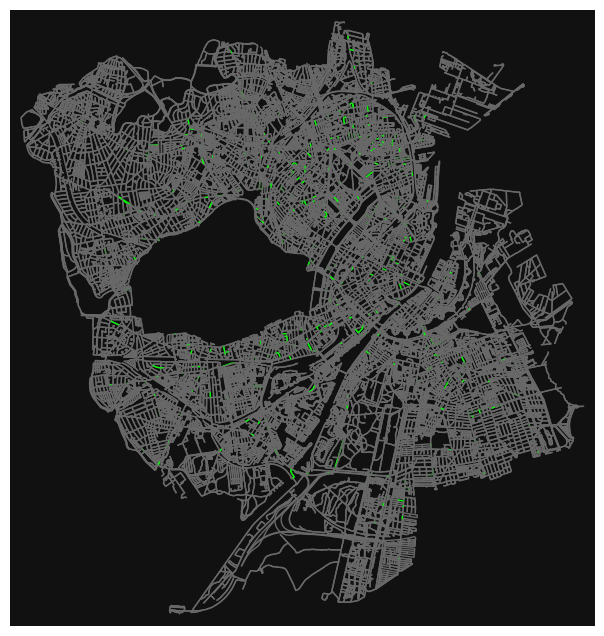

In [369]:
#Actual streets with trees 
colorlist_white_new = []
colorlist_red_new = []
for u, v,key in G2.edges(keys=True, data=False):
    if u in tn_edges["u"].tolist():
        if v in tn_edges["v"].tolist():
            colorlist_red_new.append("hi")
            colorlist_white_new.append("lime")
            
        else:
            colorlist_white_new.append("dimgray")
    else:
        colorlist_white_new.append("dimgray")
fig, ax = ox.plot_graph(G2, node_size=0, edge_color=colorlist_white_new, edge_linewidth=1, edge_alpha=1)

In [388]:
false_positives.head(1)

predictions  index  tree    probas  maxspeed    length     lanes  \
28        False  24388   1.0  0.236125       0.8  0.054435  0.333333   

    buildings_count  landuse_count  natural_count  ...  distance_from_center  \
28              0.0            0.0            0.0  ...              0.246238   

    bridge  tunnel  highway_cycleway  highway_footway  highway_other  \
28     0.0     0.0               0.0              0.0            0.0   

    highway_path  highway_residential  highway_service  highway_tertiary  
28           0.0                  0.0              0.0               1.0  

[1 rows x 30 columns]

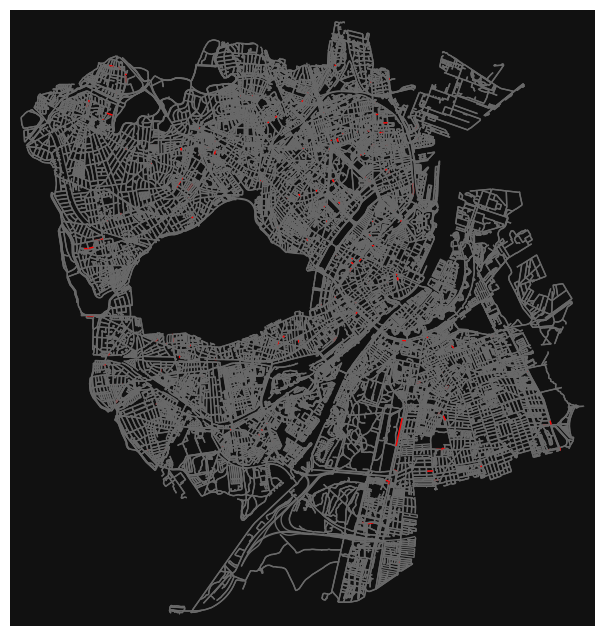

In [380]:
#Predicted streets without trees - wrong classification! 
false_positive_colors = []
false_positive_edges = []
for u, v,key in G2.edges(keys=True, data=False):
    if u in fp_edges["u"].tolist():
        if v in fp_edges["v"].tolist():
            false_positive_edges.append("hi")
            false_positive_colors.append("red")
            
        else:
            false_positive_colors.append("dimgray")
    else:
        false_positive_colors.append("dimgray")
fig, ax = ox.plot_graph(G2, node_size=0, edge_color=false_positive_colors, edge_linewidth=1, edge_alpha=1)

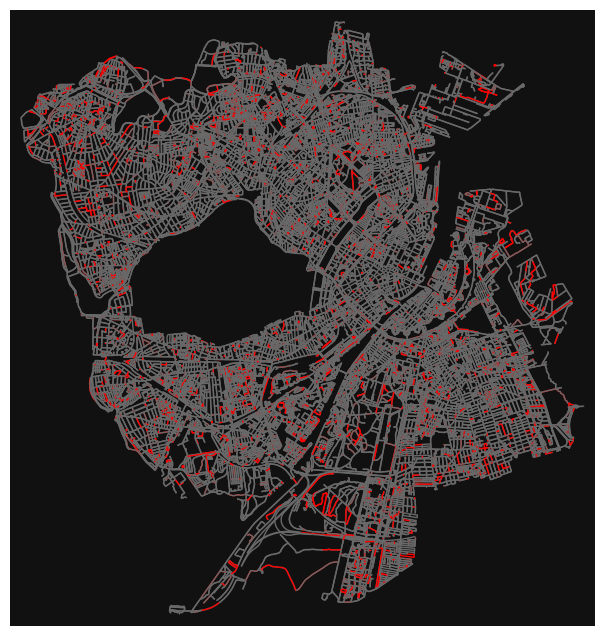

In [377]:
#Streets with no trees but classified correctly 
true_positive_colors = []
true_positive_edges = []
for u, v,key in G2.edges(keys=True, data=False):
    if u in tp_edges["u"].tolist():
        if v in tp_edges["v"].tolist():
            true_positive_edges.append("hi")
            true_positive_colors.append("red")
            
        else:
            true_positive_colors.append("dimgray")
    else:
        true_positive_colors.append("dimgray")
fig, ax = ox.plot_graph(G2, node_size=0, edge_color=true_positive_colors, edge_linewidth=1, edge_alpha=1)

In [387]:
false_negatives.head(1)

predictions  index  tree    probas  maxspeed    length     lanes  \
3         True  49268   0.0  0.535715       0.8  0.044535  0.333333   

   buildings_count  landuse_count  natural_count  ...  distance_from_center  \
3              0.0            0.0            0.0  ...              0.228071   

   bridge  tunnel  highway_cycleway  highway_footway  highway_other  \
3     0.0     0.0               0.0              0.0            0.0   

   highway_path  highway_residential  highway_service  highway_tertiary  
3           0.0                  0.0              1.0               0.0  

[1 rows x 30 columns]

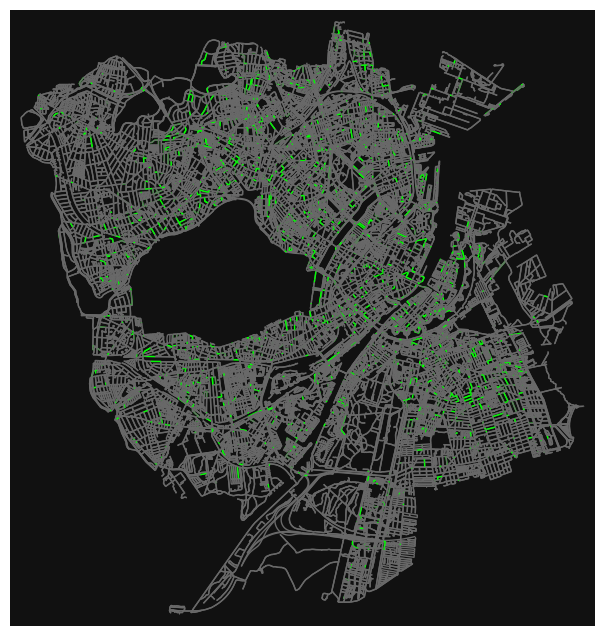

In [379]:
#Predicted streets with trees, but no trees - streets with possible trees? 
false_negative_colors = []
false_negative_edges = []
for u, v,key in G2.edges(keys=True, data=False):
    if u in fn_edges["u"].tolist():
        if v in fn_edges["v"].tolist():
            false_negative_edges.append("hi")
            false_negative_colors.append("lime")
            
        else:
            false_negative_colors.append("dimgray")
    else:
        false_negative_colors.append("dimgray")
fig, ax = ox.plot_graph(G2, node_size=0, edge_color=false_negative_colors, edge_linewidth=1, edge_alpha=1)

In [381]:
#Plot correct predictions
correct = pd.concat([tn_edges, tp_edges])

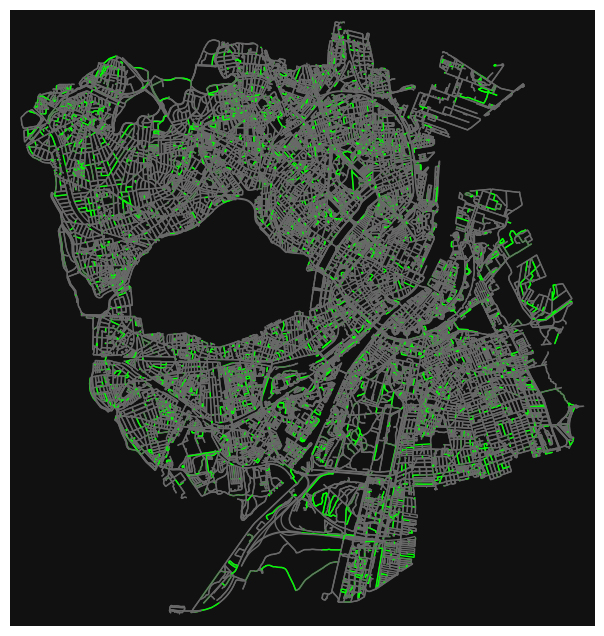

In [550]:
#Predicted streets with trees, but no trees - streets with possible trees? 
correct_colors = []
correct_edges = []
for u, v,key in G2.edges(keys=True, data=False):
    if u in correct["u"].tolist():
        if v in correct["v"].tolist():
            correct_edges.append("hi")
            correct_colors.append("lime")
            
        else:
            correct_colors.append("dimgray")
    else:
        correct_colors.append("dimgray")
fig, ax = ox.plot_graph(G2, node_size=0, edge_color=correct_colors, edge_linewidth=1, edge_alpha=1)
ax.set_title("Correct Predictions")

In [547]:
#Plot incorrect predictions
incorrect = pd.concat([fn_edges, fp_edges])

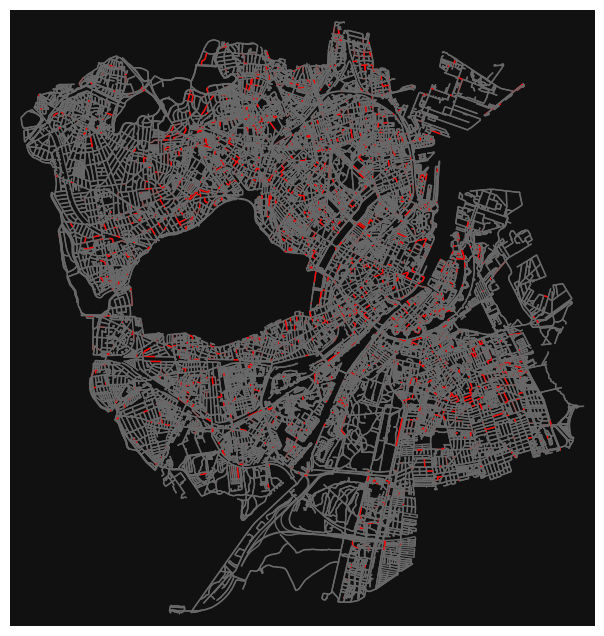

In [385]:
#Plot incorrect predictions
#Predicted streets with trees, but no trees - streets with possible trees? 
incorrect_colors = []
incorrect_edges = []
for u, v,key in G2.edges(keys=True, data=False):
    if u in incorrect["u"].tolist():
        if v in incorrect["v"].tolist():
            incorrect_edges.append("hi")
            incorrect_colors.append("red")
            
        else:
            incorrect_colors.append("dimgray")
    else:
        incorrect_colors.append("dimgray")
fig, ax = ox.plot_graph(G2, node_size=0, edge_color=incorrect_colors, edge_linewidth=1, edge_alpha=1)
ax.set_title("Incorrect Predictions")

In [4]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In [5]:
shapefile = gpd.read_file('bydele/bydel/bydelPolygon.shp',  geometry="geometry")

In [6]:
shapefile

id  bydel_nr                       navn    areal_m2 ogc_fid  \
0   1       3.0                  NÃ¸rrebro   4107620.0       1   
1   1       6.0                   VanlÃ¸se   6699013.0       2   
2   1       7.0           BrÃ¸nshÃ¸j-Husum   8740777.0       3   
3   1      10.0                Amager Vest  19364766.0       4   
4   1       2.0                  Ãsterbro   9858727.0       5   
5   1       4.0  Vesterbro-Kongens Enghave   8327301.0       6   
6   1       5.0                      Valby   9235110.0       7   
7   1       8.0                 Bispebjerg   6830452.0       8   
8   1       9.0                Amager Ãst   9800687.0       9   
9   1       1.0                   Indre By  10471990.0      10   

                                            geometry  
0  POLYGON ((12.53704 55.69653, 12.53736 55.69661...  
1  POLYGON ((12.49820 55.68552, 12.49807 55.68545...  
2  POLYGON ((12.46894 55.69975, 12.46698 55.70024...  
3  POLYGON ((12.58271 55.66850, 12.58661 55.66783...  
4  POLYGON ((12.59777 55.70348, 12.59700 55.70331...  
5  POLYGON ((12.54553 55.63972, 12.54677 55.63900...  
6  POLYGON ((12.52434 55.66666, 12.52449 55.66668...  
7  POLYGON ((12.53830 55.72644, 12.53846 55.72640...  
8  POLYGON ((12.63082 55.67057, 12.63094 55.67049...  
9  MULTIPOLYGON (((12.72897 55.70386, 12.72899 55...

In [7]:
shapefile["population"] = [56395,80779,78962,80363,65877,40710,43690,54626,62476,87226]

In [8]:
shapefile["areal_m2"] = shapefile["areal_m2"].astype("int")

In [9]:
shapefile["population_density"] = shapefile["population"] / (shapefile["areal_m2"]/1000)

In [10]:
shapefile

id  bydel_nr                       navn  areal_m2 ogc_fid  \
0   1       3.0                  NÃ¸rrebro   4107620       1   
1   1       6.0                   VanlÃ¸se   6699013       2   
2   1       7.0           BrÃ¸nshÃ¸j-Husum   8740777       3   
3   1      10.0                Amager Vest  19364766       4   
4   1       2.0                  Ãsterbro   9858727       5   
5   1       4.0  Vesterbro-Kongens Enghave   8327301       6   
6   1       5.0                      Valby   9235110       7   
7   1       8.0                 Bispebjerg   6830452       8   
8   1       9.0                Amager Ãst   9800687       9   
9   1       1.0                   Indre By  10471990      10   

                                            geometry  population  \
0  POLYGON ((12.53704 55.69653, 12.53736 55.69661...       56395   
1  POLYGON ((12.49820 55.68552, 12.49807 55.68545...       80779   
2  POLYGON ((12.46894 55.69975, 12.46698 55.70024...       78962   
3  POLYGON ((12.58271 55.66850, 12.58661 55.66783...       80363   
4  POLYGON ((12.59777 55.70348, 12.59700 55.70331...       65877   
5  POLYGON ((12.54553 55.63972, 12.54677 55.63900...       40710   
6  POLYGON ((12.52434 55.66666, 12.52449 55.66668...       43690   
7  POLYGON ((12.53830 55.72644, 12.53846 55.72640...       54626   
8  POLYGON ((12.63082 55.67057, 12.63094 55.67049...       62476   
9  MULTIPOLYGON (((12.72897 55.70386, 12.72899 55...       87226   

   population_density  
0           13.729362  
1           12.058344  
2            9.033751  
3            4.149960  
4            6.682100  
5            4.888739  
6            4.730859  
7            7.997421  
8            6.374655  
9            8.329458

(12.438985278000024, 12.748313332195444, 55.606849684208655, 55.73870494954021)

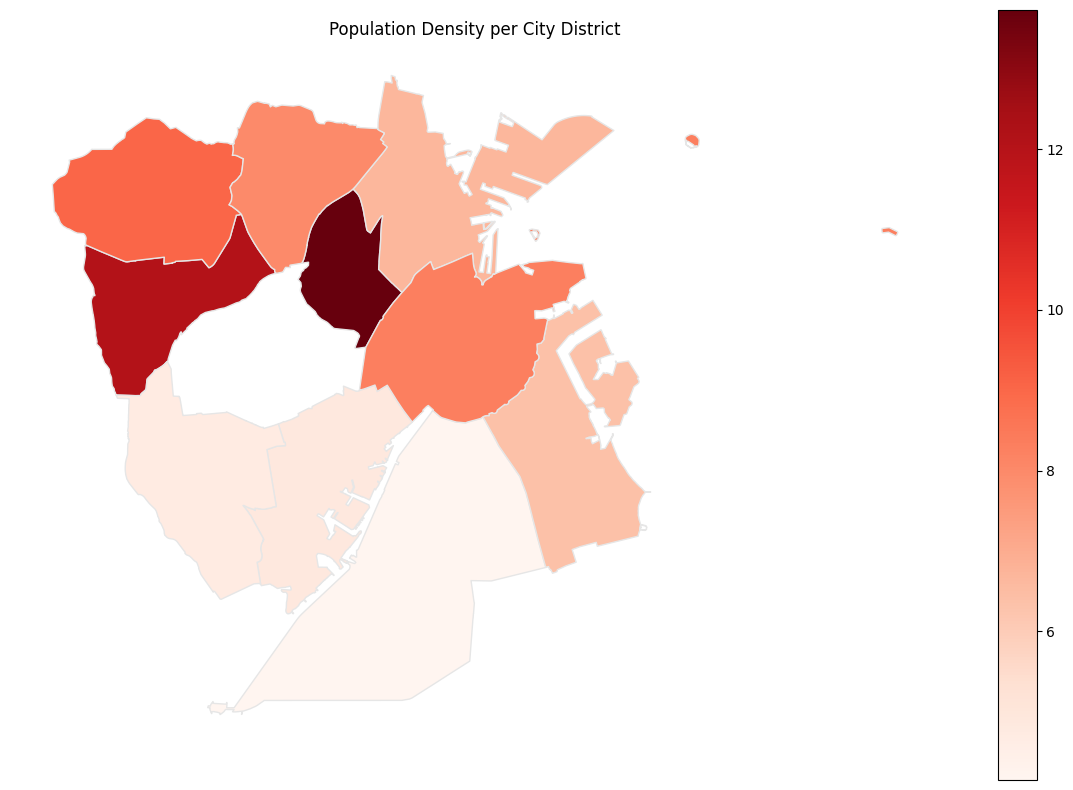

In [11]:
fig, ax = plt.subplots(1, figsize=(15,10))
shapefile.plot(column='population_density', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.set_title("Population Density per City District")
ax.axis('off')

In [513]:
fn_edges

index           u           v                                osmid  \
3          3  3289070014  4502345275                             41501770   
6          6   716891450    17551000                 [36790560, 86369605]   
12        12  1018274989  1018274987                             87528927   
15        15  3605960576  9534454762                            744435801   
21        21  3680855254  3680855278               [363979208, 363979210]   
...      ...         ...         ...                                  ...   
10401  10401     8078576  1482081955                             37451407   
10404  10404  6535947090  8548388927  [1190212266, 1190212267, 920683599]   
10405  10405     8228720     8228719                            797149514   
10406  10406     8084566     7636805                             87325152   
10407  10407   747283591   747283595                             60827343   

                          name      highway  maxspeed   length  lanes  \
3      Gunnar Nu Hansens Plads      service      50.0   52.555      2   
6                       Nyhavn        other      50.0   58.638      2   
12                         NaN      footway      50.0   44.155      2   
15                Wibrandtsvej  residential      50.0   23.261      2   
21                         NaN        other      50.0  279.396      2   
...                        ...          ...       ...      ...    ...   
10401            Amagerbrogade     tertiary      50.0   45.449      2   
10404                      NaN      footway      50.0  134.557      2   
10405               Bragesgade  residential      50.0  101.716      2   
10406               Borgergade  residential      40.0   39.500      2   
10407                      NaN         path      50.0   21.095      2   

                                                geometry  ...  id  slaegt  \
3      LINESTRING (12.5748782 55.7048787, 12.5740406 ...  ... NaN       0   
6      LINESTRING (12.5939943 55.6792264, 12.5939285 ...  ... NaN       0   
12     LINESTRING (12.6042311 55.6716229, 12.6042408 ...  ... NaN       0   
15     LINESTRING (12.624577 55.646872, 12.6247361 55...  ... NaN       0   
21     LINESTRING (12.5642173 55.7256571, 12.5642309 ...  ... NaN       0   
...                                                  ...  ...  ..     ...   
10401  LINESTRING (12.616109 55.6426499, 12.6163036 5...  ... NaN       0   
10404  LINESTRING (12.5789499 55.6716459, 12.5791027 ...  ... NaN       0   
10405  LINESTRING (12.5458914 55.7010353, 12.5451111 ...  ... NaN       0   
10406  LINESTRING (12.5878969 55.6868739, 12.5881683 ...  ... NaN       0   
10407  LINESTRING (12.5764101 55.6697458, 12.5761743 ...  ... NaN       0   

       bydelsnavn  placering  omgivelse  wkb_geometry  planteaar  lon  lat  \
3               0          0          0           NaN        0.0  NaN  NaN   
6               0          0          0           NaN        0.0  NaN  NaN   
12              0          0          0           NaN        0.0  NaN  NaN   
15              0          0          0           NaN        0.0  NaN  NaN   
21              0          0          0           NaN        0.0  NaN  NaN   
...           ...        ...        ...           ...        ...  ...  ...   
10401           0          0          0           NaN        0.0  NaN  NaN   
10404           0          0          0           NaN        0.0  NaN  NaN   
10405           0          0          0           NaN        0.0  NaN  NaN   
10406           0          0          0           NaN        0.0  NaN  NaN   
10407           0          0          0           NaN        0.0  NaN  NaN   

       tree_count  
3             0.0  
6             0.0  
12            0.0  
15            0.0  
21            0.0  
...           ...  
10401         0.0  
10404         0.0  
10405         0.0  
10406         0.0  
10407         0.0  

[2499 rows x 37 columns]

In [452]:
populated_areas_no_trees = df_test_info.query("bydelsnavn in ['Brønshøj-Husum', 'Vanløse','Bispebjerg']")

In [462]:
#Find maximum value of length of street with no trees located
false_negatives.query("length > 0.3")

predictions  index  tree    probas  maxspeed    length     lanes  \
2396         True  51220   0.0  0.749761       0.8  0.361822  0.333333   
5313         True   7525   0.0  0.723525       0.8  0.375511  0.333333   

      buildings_count  landuse_count  natural_count  ...  \
2396              0.0            0.0            0.0  ...   
5313              0.0            0.0            0.0  ...   

      distance_from_center  bridge  tunnel  highway_cycleway  highway_footway  \
2396              0.373818     0.0     0.0               1.0              0.0   
5313              0.315302     0.0     0.0               1.0              0.0   

      highway_other  highway_path  highway_residential  highway_service  \
2396            0.0           0.0                  0.0              0.0   
5313            0.0           0.0                  0.0              0.0   

      highway_tertiary  
2396               0.0  
5313               0.0  

[2 rows x 30 columns]

In [463]:
df_test_info.query("index == 7525")

index           u         v     osmid       name   highway  maxspeed  \
7525   7525  6174509858  26492971  27116543  Emdrupvej  tertiary      50.0   

      length  lanes                                           geometry  ...  \
7525  37.886      2  LINESTRING (12.532423 55.7229895, 12.5330265 5...  ...   

      id  slaegt  bydelsnavn  placering  omgivelse  wkb_geometry  planteaar  \
7525 NaN       0           0          0          0           NaN        0.0   

      lon  lat  tree_count  
7525  NaN  NaN         0.0  

[1 rows x 37 columns]

In [492]:
df_test_info["bydelsnavn"].value_counts().sort_values()

bydelsnavn
Brønshøj-Husum                 31
Bispebjerg                     37
Vanløse                        44
Amager Øst                     48
Valby                          59
Vesterbro-Kongens Enghave      66
Amager Vest                    68
Nørrebro                       81
Indre By                       98
Østerbro                      124
0                            9756
Name: count, dtype: int64

In [499]:
### Case study - emdrupvej
trees_districts = df_test_info["bydelsnavn"].value_counts()

In [503]:
trees_districts

bydelsnavn
0                            9756
Østerbro                      124
Indre By                       98
Nørrebro                       81
Amager Vest                    68
Vesterbro-Kongens Enghave      66
Valby                          59
Amager Øst                     48
Vanløse                        44
Bispebjerg                     37
Brønshøj-Husum                 31
Name: count, dtype: int64

In [508]:
population = shapefile["population"].tolist()

In [509]:
shapefile

id  bydel_nr                       navn  areal_m2 ogc_fid  \
0   1       3.0                  NÃ¸rrebro   4107620       1   
1   1       6.0                   VanlÃ¸se   6699013       2   
2   1       7.0           BrÃ¸nshÃ¸j-Husum   8740777       3   
3   1      10.0                Amager Vest  19364766       4   
4   1       2.0                  Ãsterbro   9858727       5   
5   1       4.0  Vesterbro-Kongens Enghave   8327301       6   
6   1       5.0                      Valby   9235110       7   
7   1       8.0                 Bispebjerg   6830452       8   
8   1       9.0                Amager Ãst   9800687       9   
9   1       1.0                   Indre By  10471990      10   

                                            geometry  population  \
0  POLYGON ((12.53704 55.69653, 12.53736 55.69661...       56395   
1  POLYGON ((12.49820 55.68552, 12.49807 55.68545...       80779   
2  POLYGON ((12.46894 55.69975, 12.46698 55.70024...       78962   
3  POLYGON ((12.58271 55.66850, 12.58661 55.66783...       80363   
4  POLYGON ((12.59777 55.70348, 12.59700 55.70331...       65877   
5  POLYGON ((12.54553 55.63972, 12.54677 55.63900...       40710   
6  POLYGON ((12.52434 55.66666, 12.52449 55.66668...       43690   
7  POLYGON ((12.53830 55.72644, 12.53846 55.72640...       54626   
8  POLYGON ((12.63082 55.67057, 12.63094 55.67049...       62476   
9  MULTIPOLYGON (((12.72897 55.70386, 12.72899 55...       87226   

   population_density  
0           13.729362  
1           12.058344  
2            9.033751  
3            4.149960  
4            6.682100  
5            4.888739  
6            4.730859  
7            7.997421  
8            6.374655  
9            8.329458

In [538]:
from shapely import wkt
#fn_edges['geometry'] = fn_edges['geometry'].apply(wkt.loads)

fn_edges_gdf = gpd.GeoDataFrame(fn_edges, geometry='geometry')
fn_edges_gdf.head(1)

index           u           v     osmid                     name  highway  \
3      3  3289070014  4502345275  41501770  Gunnar Nu Hansens Plads  service   

   maxspeed  length  lanes                                           geometry  \
3      50.0  52.555      2  LINESTRING (12.57488 55.70488, 12.57404 55.70485)   

   ...  id  slaegt  bydelsnavn  placering  omgivelse  wkb_geometry  planteaar  \
3  ... NaN       0           0          0          0           NaN        0.0   

   lon  lat  tree_count  
3  NaN  NaN         0.0  

[1 rows x 37 columns]

In [539]:
pred_trees_districts = gpd.sjoin(fn_edges_gdf, shapefile, how = 'inner', predicate = "intersects")

/var/folders/92/g6x9yhvs6qs640vx7psry10r0000gn/T/ipykernel_76591/1341881337.py:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...




In [540]:
pred_trees_districts.head()

index           u           v                   osmid  \
3       3  3289070014  4502345275                41501770   
21     21  3680855254  3680855278  [363979208, 363979210]   
22     22  3762016481  3762016484               287791649   
62     62  9666731514  3637243102              1051916551   
67     67  5667191522    20925426   [48638322, 512071076]   

                       name      highway  maxspeed   length  lanes  \
3   Gunnar Nu Hansens Plads      service      50.0   52.555      2   
21                      NaN        other      50.0  279.396      2   
22                 Oceankaj        other      40.0  115.707      2   
62             Dampfærgevej  residential      50.0   55.200      2   
67             Ryvangs Allé     tertiary      50.0   38.911      2   

                                             geometry  ...  planteaar  lon  \
3   LINESTRING (12.57488 55.70488, 12.57404 55.70485)  ...        0.0  NaN   
21  LINESTRING (12.56422 55.72566, 12.56423 55.725...  ...        0.0  NaN   
22  LINESTRING (12.62838 55.71781, 12.62968 55.718...  ...        0.0  NaN   
62  LINESTRING (12.59477 55.70084, 12.59556 55.70062)  ...        0.0  NaN   
67  LINESTRING (12.57581 55.71717, 12.57557 55.717...  ...        0.0  NaN   

    lat  tree_count  index_right  id_right  bydel_nr       navn   areal_m2  \
3   NaN         0.0            4         1       2.0  Ãsterbro  9858727.0   
21  NaN         0.0            4         1       2.0  Ãsterbro  9858727.0   
22  NaN         0.0            4         1       2.0  Ãsterbro  9858727.0   
62  NaN         0.0            4         1       2.0  Ãsterbro  9858727.0   
67  NaN         0.0            4         1       2.0  Ãsterbro  9858727.0   

    ogc_fid  
3         5  
21        5  
22        5  
62        5  
67        5  

[5 rows x 43 columns]

In [542]:
#### Tree preds per city district 
pred_trees_districts["navn"].value_counts().sort_values()

navn
BrÃ¸nshÃ¸j-Husum             105
VanlÃ¸se                     168
Valby                        189
NÃ¸rrebro                    228
Amager Ãst                  237
Vesterbro-Kongens Enghave    242
Amager Vest                  269
Bispebjerg                   276
Ãsterbro                    363
Indre By                     448
Name: count, dtype: int64